In [6]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 3.997
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_big_minstable_r3.997_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r3.997.csv", delimiter=" ")

print(menor.shape)

(3900, 4)


In [7]:


def turnintoarray(erro_list,d):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),d)
    return erro_array

    
def geterrors(FUTUREerror):
    
    a = abs(FUTUREerror)
    b = FUTUREerror**2
    
    mae = []
    mse = []
    rmse = []
    
    for i in range(FUTUREerror.shape[1]):
        mae.append(np.sum(a,axis=0)[i]/FUTUREerror.shape[0])
        mse.append(np.sum(b,axis=0)[i]/FUTUREerror.shape[0])
        rmse.append(np.sqrt(np.sum(b,axis=0)[i]/FUTUREerror.shape[0]))
        
   
    
    return mae,mse,rmse

In [8]:


future_error = []




for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    future_t = np.zeros((10))
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 100
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    future_error.append(prediction.flatten()-data[trainlen:trainlen+future])
   

    
    
    

0 test error: 10.664326754964533
1 test error: 1.9366295256194759
2 test error: 9.89421374909633
3 test error: 0.46216454412930214
4 test error: 2.5429169246489494
5 test error: 13.089766225648484
6 test error: 2.0803106720443987
7 test error: 0.42956335642036253
8 test error: 0.4164100460163021
9 test error: 0.4177048443047184
10 test error: 7.4162703813374895
11 test error: 10.698456282862045
12 test error: 0.9916523126127285
13 test error: 0.46531057409342036
14 test error: 7.49540302453984
15 test error: 0.40702047899746474
16 test error: 1.291809774963719
17 test error: 10.034045866190633
18 test error: 0.4040958426974547
19 test error: 5.059313014408807
20 test error: 2.124023010313582
21 test error: 14.832075661578635
22 test error: 6.870778429632831
23 test error: 10.176099083309827
24 test error: 0.4598145770482006
25 test error: 0.4370704129579965
26 test error: 2.219112186690451
27 test error: 14.245677271130203
28 test error: 0.4692762660826762
29 test error: 0.444651208032

243 test error: 14.376297160630697
244 test error: 11.192017034938829
245 test error: 0.4612964497871578
246 test error: 2.7548655598662797
247 test error: 10.892645919046362
248 test error: 8.767425170500061
249 test error: 3.880372209890533
250 test error: 5.93300285149174
251 test error: 10.14294319254865
252 test error: 0.4677548960921693
253 test error: 0.41129365481256025
254 test error: 0.48072118980066086
255 test error: 8.23688682893098
256 test error: 0.4203244720336362
257 test error: 1.2651315269415577
258 test error: 3.234459941636391
259 test error: 11.878583837842054
260 test error: 0.8179720927944052
261 test error: 10.419129710741661
262 test error: 0.4676207165081726
263 test error: 13.591830179870694
264 test error: 0.4657988824792315
265 test error: 0.4283054921355842
266 test error: 10.847170270119062
267 test error: 6.549065966895252
268 test error: 0.43638250347025925
269 test error: 2.029886810700927
270 test error: 5.26837528790978
271 test error: 1.76238872406

478 test error: 13.266248675080192
479 test error: 11.510790008821596
480 test error: 0.4453496678721598
481 test error: 10.949058334144194
482 test error: 0.4711222654090837
483 test error: 4.6456343565289355
484 test error: 0.443423703600429
485 test error: 0.48179015784466644
486 test error: 11.485470387640337
487 test error: 20.374515240892457
488 test error: 1.5176075376631986
489 test error: 13.170651102396725
490 test error: 11.953495882365543
491 test error: 15.741817361889828
492 test error: 11.06981989954876
493 test error: 9.844107154474875
494 test error: 0.43711065716545333
495 test error: 8.495165444457768
496 test error: 11.403375640683869
497 test error: 0.4763679382295255
498 test error: 10.453145836776644
499 test error: 6.577253574057447
500 test error: 0.6072251859956319
501 test error: 1.3479770976757826
502 test error: 12.568438520262777
503 test error: 0.42754738240328394
504 test error: 13.183614066266111
505 test error: 12.331966167507565
506 test error: 2.1226

714 test error: 0.41642875252680367
715 test error: 0.4219963882993522
716 test error: 0.45063083314303587
717 test error: 0.3994409261258884
718 test error: 0.473302328099491
719 test error: 14.585571185660722
720 test error: 0.45371980833089404
721 test error: 0.4776311588062921
722 test error: 1.3250918591550935
723 test error: 0.4456796529331948
724 test error: 1.7046284026255996
725 test error: 17.29210606677069
726 test error: 1.6534690454113778
727 test error: 2.3295697482991855
728 test error: 1.069991384254643
729 test error: 1.4900233565300518
730 test error: 0.4421617741621719
731 test error: 0.4597331041816357
732 test error: 0.4673019366063807
733 test error: 13.303533538306569
734 test error: 0.3974190682990426
735 test error: 18.0122702876616
736 test error: 0.6737084180407991
737 test error: 0.41852291711915063
738 test error: 17.081644819838854
739 test error: 8.914692426589603
740 test error: 0.4400797963794432
741 test error: 16.189236169243518
742 test error: 13.324

951 test error: 0.4733006597034785
952 test error: 1.3149187756007439
953 test error: 0.4369327122696705
954 test error: 0.4203502878959396
955 test error: 14.925465294153408
956 test error: 0.4389539628034681
957 test error: 11.363032856619725
958 test error: 0.4125482890143
959 test error: 12.131040400145816
960 test error: 0.45555407727009034
961 test error: 6.670646018705793
962 test error: 11.582958838034257
963 test error: 0.47418146804989136
964 test error: 13.372474728321214
965 test error: 0.4551358649669896
966 test error: 0.392670951268188
967 test error: 11.604347815063011
968 test error: 0.4650412124405561
969 test error: 0.42495471517497974
970 test error: 0.4800504996784224
971 test error: 12.911490805952933
972 test error: 5.313978364774104
973 test error: 9.173979219243677
974 test error: 13.935560540713444
975 test error: 0.44700751248119247
976 test error: 14.053137570237482
977 test error: 0.432961428127396
978 test error: 9.227355196615843
979 test error: 12.793043

1181 test error: 0.4223004039446457
1182 test error: 0.43702345249178887
1183 test error: 5.742969123742663
1184 test error: 13.338181599148623
1185 test error: 14.02857109856852
1186 test error: 0.42477437940464124
1187 test error: 12.179553779700463
1188 test error: 0.46332801026020154
1189 test error: 18.549954109713003
1190 test error: 1.7770014245739993
1191 test error: 10.160795040027129
1192 test error: 0.4396409197065103
1193 test error: 0.4896809409095858
1194 test error: 9.081150834993823
1195 test error: 0.4213496726460168
1196 test error: 2.004158588162569
1197 test error: 1.1866649148646944
1198 test error: 0.4148533256321937
1199 test error: 0.4391110757726304
1200 test error: 0.36592239913942054
1201 test error: 9.207167419110847
1202 test error: 0.4054662589850871
1203 test error: 0.4244169813583349
1204 test error: 9.738783209636997
1205 test error: 0.4620318341810813
1206 test error: 0.3979717060919114
1207 test error: 4.4939920620165985
1208 test error: 16.7065962207

1411 test error: 0.44596369451807055
1412 test error: 0.41376968665119884
1413 test error: 10.92496857605717
1414 test error: 13.63837718230148
1415 test error: 0.4663911170886265
1416 test error: 10.381978587171195
1417 test error: 9.099804567622726
1418 test error: 0.4563509761059686
1419 test error: 6.743608465330786
1420 test error: 17.458412738752205
1421 test error: 16.9415069223852
1422 test error: 0.456516202147347
1423 test error: 0.4647944240438743
1424 test error: 0.47231002730320126
1425 test error: 1.1548699091221177
1426 test error: 0.571805629289149
1427 test error: 14.371326548255446
1428 test error: 0.42009528918051725
1429 test error: 13.30839693584015
1430 test error: 0.4751675598609707
1431 test error: 0.39991042240851865
1432 test error: 12.611938702842364
1433 test error: 12.920979433609638
1434 test error: 0.4899383342215258
1435 test error: 2.814335123241454
1436 test error: 0.4540596704177177
1437 test error: 11.749859649876575
1438 test error: 14.4009886166553

1641 test error: 10.723385521795526
1642 test error: 11.440058007802357
1643 test error: 24.915253619160215
1644 test error: 0.4505933616631307
1645 test error: 12.864790819555463
1646 test error: 9.93972952147463
1647 test error: 0.44903977592689326
1648 test error: 0.49584939447901455
1649 test error: 11.499749302843703
1650 test error: 4.600386925477778
1651 test error: 1.5519486790754204
1652 test error: 0.4359244513553341
1653 test error: 0.46895693165867286
1654 test error: 0.5069568034929923
1655 test error: 15.214992908689217
1656 test error: 13.430353203866405
1657 test error: 3.115524449504978
1658 test error: 12.223555300868078
1659 test error: 12.607321866103081
1660 test error: 6.998662588466122
1661 test error: 12.604400083874454
1662 test error: 0.4656135479775324
1663 test error: 0.452931313006409
1664 test error: 0.4314991151546533
1665 test error: 0.48370724248818137
1666 test error: 10.106503129872358
1667 test error: 1.4779783977686105
1668 test error: 0.46921374142

1870 test error: 13.841699994473228
1871 test error: 0.45030146508894947
1872 test error: 1.1068696410275878
1873 test error: 10.34403264877953
1874 test error: 0.4647843206380868
1875 test error: 5.913744528183238
1876 test error: 0.4915900566649975
1877 test error: 12.893059646554562
1878 test error: 6.29827744499994
1879 test error: 0.44271264092398
1880 test error: 2.992118046052773
1881 test error: 0.42340004944404813
1882 test error: 5.268782956485132
1883 test error: 7.9930378986943795
1884 test error: 9.09770670542678
1885 test error: 12.016881476251898
1886 test error: 3.25903495614563
1887 test error: 9.20273447412552
1888 test error: 0.4666253138084166
1889 test error: 0.39713857354177
1890 test error: 0.38336456928924156
1891 test error: 0.46474100150352704
1892 test error: 9.391350676182942
1893 test error: 0.406253714872408
1894 test error: 4.14488880244796
1895 test error: 8.542469745914573
1896 test error: 5.891709094245687
1897 test error: 0.4869488357572154
1898 test 

2101 test error: 0.44736317028684836
2102 test error: 0.45827296292417774
2103 test error: 0.4365456435654892
2104 test error: 9.95135521551811
2105 test error: 8.071856980843789
2106 test error: 0.47673043682533284
2107 test error: 0.4394827827651001
2108 test error: 4.317527406261288
2109 test error: 0.4645847180755146
2110 test error: 13.252319005760146
2111 test error: 12.433133652376286
2112 test error: 14.493844330286752
2113 test error: 0.42442886247724837
2114 test error: 0.7212026498357054
2115 test error: 0.4335032235255867
2116 test error: 0.4292553953956561
2117 test error: 12.275725533066018
2118 test error: 4.59797576381558
2119 test error: 0.41738861824039786
2120 test error: 8.44318418573724
2121 test error: 0.46414585848278095
2122 test error: 0.42236077344692347
2123 test error: 9.191784031046323
2124 test error: 0.4935059669857206
2125 test error: 9.274682537589266
2126 test error: 0.44860676359872115
2127 test error: 0.7732454510416129
2128 test error: 0.43966561438

2330 test error: 0.4704768516431541
2331 test error: 2.1030527776257624
2332 test error: 0.44404478009632076
2333 test error: 25.815296703415733
2334 test error: 7.234586924884313
2335 test error: 4.105997122601392
2336 test error: 0.4515524404563795
2337 test error: 9.379414061207878
2338 test error: 0.4470477102090016
2339 test error: 0.42832238609747264
2340 test error: 0.8922507768174877
2341 test error: 9.74281582043749
2342 test error: 10.471597263732134
2343 test error: 0.4066865271696362
2344 test error: 7.485782463572044
2345 test error: 10.25419233972422
2346 test error: 15.085798513509726
2347 test error: 7.2431771870807795
2348 test error: 12.063092586036886
2349 test error: 0.5039801830025414
2350 test error: 2.7971791104659363
2351 test error: 10.586199879146184
2352 test error: 6.637337257375194
2353 test error: 0.43585476113354576
2354 test error: 13.459907225881421
2355 test error: 13.672438395779045
2356 test error: 9.630333495278279
2357 test error: 11.68727204156478

2560 test error: 3.3816463249846542
2561 test error: 15.184688058140154
2562 test error: 0.4315373117744213
2563 test error: 2.818720870429783
2564 test error: 10.701146940582074
2565 test error: 0.46610214788776866
2566 test error: 2.6749661011148116
2567 test error: 10.149710572645443
2568 test error: 8.94833585170056
2569 test error: 1.1111168602535457
2570 test error: 0.44301355766314887
2571 test error: 0.46986004092418693
2572 test error: 13.221471595532178
2573 test error: 0.5188970613854014
2574 test error: 0.4900038283376323
2575 test error: 5.776258260061499
2576 test error: 11.101132729375232
2577 test error: 0.430335621437962
2578 test error: 2.411368043422767
2579 test error: 8.653216973773366
2580 test error: 10.794361314851987
2581 test error: 10.524938346887396
2582 test error: 0.4805704515543056
2583 test error: 13.263977358942626
2584 test error: 0.43639581518323195
2585 test error: 0.4588254415989777
2586 test error: 3.205955663087367
2587 test error: 14.517512137553

2793 test error: 0.4290182272683768
2794 test error: 0.4507421265656336
2795 test error: 0.4796621837337268
2796 test error: 14.318961033023278
2797 test error: 0.4714242980243571
2798 test error: 0.445778109986463
2799 test error: 11.198583111099854
2800 test error: 14.515392787460293
2801 test error: 3.6703249563651936
2802 test error: 0.44424534409641814
2803 test error: 0.44397505014381144
2804 test error: 0.4698020196603965
2805 test error: 14.595782658995727
2806 test error: 0.49246361786851706
2807 test error: 12.850457770783663
2808 test error: 7.217152854274731
2809 test error: 0.4318888913540149
2810 test error: 0.4723012203773863
2811 test error: 6.215377139873704
2812 test error: 0.45234532387662246
2813 test error: 0.463146596753163
2814 test error: 5.083436916205697
2815 test error: 0.4433414861370909
2816 test error: 0.42323838462326663
2817 test error: 6.078911531581027
2818 test error: 0.41670146626819954
2819 test error: 0.43590895517400224
2820 test error: 13.8580359

3022 test error: 0.45981788539686047
3023 test error: 0.4318962367298634
3024 test error: 4.438561885305832
3025 test error: 0.4690985022760823
3026 test error: 14.861544031725394
3027 test error: 3.5427143272819817
3028 test error: 2.5577835296462346
3029 test error: 0.4593508580846168
3030 test error: 1.1983163066494378
3031 test error: 9.086097676952066
3032 test error: 0.46643437892853423
3033 test error: 0.4502276575408222
3034 test error: 0.44465886640967084
3035 test error: 0.47671414426892866
3036 test error: 15.398961782419939
3037 test error: 13.928240875816746
3038 test error: 0.4484812707244022
3039 test error: 0.46163691113628713
3040 test error: 0.415998763142097
3041 test error: 0.5030402098526552
3042 test error: 1.8281133254826039
3043 test error: 9.211432203724256
3044 test error: 0.4189653706609252
3045 test error: 0.42674726977196603
3046 test error: 2.7498513629122354
3047 test error: 0.43259300842428866
3048 test error: 2.478380222078692
3049 test error: 13.240390

3252 test error: 0.43282150524529417
3253 test error: 14.891381611867722
3254 test error: 6.0494267583516175
3255 test error: 0.4085511379687707
3256 test error: 0.4507906992414603
3257 test error: 0.9599370004051286
3258 test error: 0.4725915284519389
3259 test error: 0.4632951032447313
3260 test error: 5.265886442739839
3261 test error: 11.64278363947644
3262 test error: 0.47707897605688765
3263 test error: 7.596362990374085
3264 test error: 2.8812603331317996
3265 test error: 0.45412688124759004
3266 test error: 0.4730498060254517
3267 test error: 10.627311040135037
3268 test error: 5.089529999074017
3269 test error: 0.4607076418121957
3270 test error: 9.826618906716185
3271 test error: 0.39745243541076325
3272 test error: 2.9849361421907927
3273 test error: 3.2124775904274205
3274 test error: 22.387611295597093
3275 test error: 15.1951716344396
3276 test error: 0.4311044268090697
3277 test error: 14.193484327761071
3278 test error: 2.4438659840870853
3279 test error: 0.459716134752

3481 test error: 0.4444665564600344
3482 test error: 11.872079708478044
3483 test error: 0.45489983835773407
3484 test error: 0.39468245814306346
3485 test error: 13.575733714174527
3486 test error: 12.922222570549012
3487 test error: 0.4730659000532398
3488 test error: 0.388551383674066
3489 test error: 5.1539581891049995
3490 test error: 8.52020081659404
3491 test error: 11.69838209371123
3492 test error: 0.44369999867057514
3493 test error: 6.444970835716971
3494 test error: 0.49954758529459226
3495 test error: 0.42872134006774604
3496 test error: 10.659054198349965
3497 test error: 9.767350205103195
3498 test error: 10.823310809317103
3499 test error: 6.132987856303583
3500 test error: 2.8648846656911884
3501 test error: 12.578212190873717
3502 test error: 1.79668072863888
3503 test error: 10.648839613290942
3504 test error: 0.45813367566687513
3505 test error: 13.285601151794205
3506 test error: 10.500097047485495
3507 test error: 0.4808920343202403
3508 test error: 5.085686757724

3710 test error: 0.4207571341164116
3711 test error: 0.4738663563983749
3712 test error: 4.99568591661321
3713 test error: 13.130441107491357
3714 test error: 9.936558446845513
3715 test error: 0.4199333053626071
3716 test error: 4.973427589258591
3717 test error: 0.4554380968971393
3718 test error: 0.44735564077294754
3719 test error: 6.499818448206805
3720 test error: 8.332591203936152
3721 test error: 11.952115403001297
3722 test error: 0.419315205082135
3723 test error: 0.45956128315613565
3724 test error: 2.0020358122850515
3725 test error: 13.535947781233983
3726 test error: 7.318068110984986
3727 test error: 15.62236901148054
3728 test error: 0.4866675849621307
3729 test error: 0.6928290781828379
3730 test error: 11.82238365184588
3731 test error: 10.462883931530465
3732 test error: 0.46024384465133145
3733 test error: 2.0205291416197952
3734 test error: 13.46484250691413
3735 test error: 11.526800804278896
3736 test error: 0.9445237872646438
3737 test error: 11.367483437178
373

In [9]:
FUTUREerror = turnintoarray(future_error,future)
mae,mse,rmse = geterrors(FUTUREerror)

print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')


mae [0.0011329583585806752, 0.0014698813030584125, 0.0015785157054591928, 0.0017120100442994174, 0.0016640164110687484, 0.0016848700783927148, 0.0017574268081698911, 0.0019562125907869902, 0.003146071982729574, 0.0062089603414447825, 0.013047179277101037, 0.028142950082263026, 0.059639920989244144, 0.1183272240211167, 0.24423045689456438, 0.39617565200392474, 0.5589799312982738, 0.7163600457228521, 0.8320293822313293, 0.9775265601657179, 1.0762189771601163, 1.240655167114816, 1.3337311073207776, 1.4548549140248106, 1.5852792846058457, 1.6922881699577497, 1.817231264259076, 1.9420166682309594, 2.0584313258568363, 2.185495984673004, 2.2866347016371136, 2.397499155822764, 2.541462198623966, 2.633559135997882, 2.7278935472883115, 2.837172814394733, 2.9579206423079465, 3.0223553016844575, 3.138661430486558, 3.1965259721000616, 3.3110677126662305, 3.3884180297398614, 3.4689954747291667, 3.5111439160905604, 3.6352301861101854, 3.7203386463971917, 3.7739140656919092, 3.8965255685918483, 3.9571

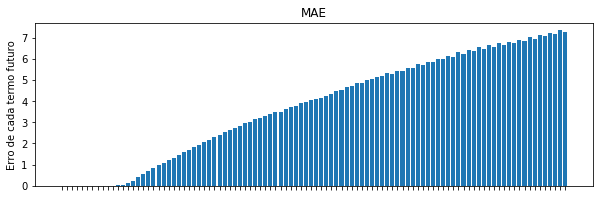

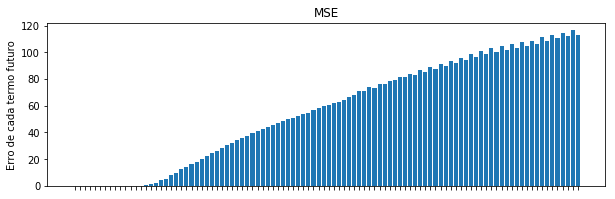

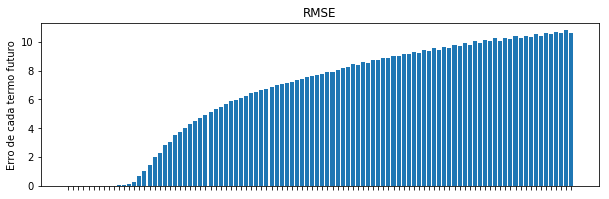

In [10]:

label = []

plt.figure(figsize=(10,3))
index = np.arange(len(mae))
plt.bar(index, mae)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse))
plt.bar(index, mse)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse))
plt.bar(index, rmse)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

    